In [53]:
import rasterio
import numpy as np

image_file = "TIR_NDVI_modified.tif"


# Load the multi-band raster
with rasterio.open(image_file) as src:
    #Thermal Infrared band
    band_thermal = src.read(1)
    
    #NDVI band
    band_ndvi = src.read(2)
    
    
    # Calculate Top of Atmosphere Reflectance (ToA)
    #Multiplicative Constant = 0.0003342
    #Additive Constaant = 0.1
    #ToA = (band_thermal.astype(float) + band_thermal.astype(float))
    ToA = (band_thermal.astype(float)*0.0003342 + 0.1)
    
    
    
    # Convert Top of Atmosphere Reflectance (ToA) to Brightness Temperature (BT)
    #K1 Constant = 774.8853
    #K2 Constaant = 1321.0789
    BT = (1321.0789 / np.log( (774.8853 / ToA) + 1)) - 273.15
    
    
    
    # Compute Proportion of Vegetation (Pv)
    #NDVI Min = -0.587877
    #NDVI Max = 0.253456
    Pv = np.square( (band_ndvi + 0.253456) / (-0.587877 + 0.253456) )
    
    
    
    
    # Compute Emmisivity (e)
    e = 0.004*Pv + 0.986
    
    
    
    # Finally generate Land Surface Temperature (LST)
    LST = ( BT / (1 + (0.00115*BT / 1.4388) * np.log(e) ) )

# Set spatial characteristics of the output object to mirror the input
kwargs = src.meta
kwargs.update(
    dtype=rasterio.float32,
    count = 1)

# Create the file
with rasterio.open('LST_1.tif', 'w', **kwargs) as dst:
        dst.write_band(1, LST.astype(rasterio.float32))

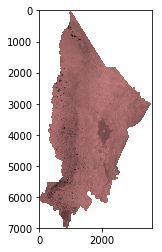

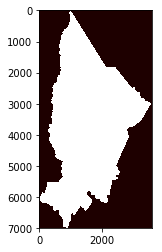

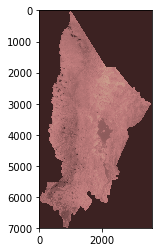

In [54]:
from matplotlib import pyplot
pyplot.imshow(band_thermal, cmap='pink')

#plot thermal band
pyplot.show() 

pyplot.imshow(band_ndvi, cmap='pink')

#plot NDVI band
pyplot.show() 


with rasterio.open('LST_1.tif') as src_:
    lst = src_.read(1)
pyplot.imshow(lst, cmap='pink')

#plot LST Map
pyplot.show() 

